In [ ]:
import pandas as pd
import joblib # Utilizado para exportar/importar o modelo para o ambiente de produção

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC # Classificador
from sklearn.pipeline import Pipeline

import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cópia de news_headlines.csv")

In [ ]:
df

,post,tags
0,após quentinhas e alimentação cortada vasco ac...,esporte
1,até os <digit><digit> dá para sonhar diz idoso...,educacao
2,brigadeiro da aprovação oração mãe e filha jun...,educacao
3,estou preparada diz filha de professora e cand...,educacao
4,hamburgada do bem feita por professora do rj f...,educacao
...,...,...
11764,zidane reconhece fracasso e admite cargo ameaç...,esporte
11765,zidane se inspira em início no real para afast...,esporte
11766,zidane vê como natural substituição de cr<digi...,esporte
11767,zizi lança gravação de música inédita da trilh...,musica


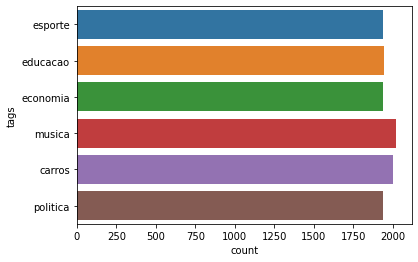

In [ ]:
sns.countplot(y='tags', data=df)

In [ ]:
le = LabelEncoder()

Y = le.fit_transform(df['tags']) #Convertendo classes da coluna Tags para valores numéricos

In [ ]:
Y

array([3, 2, 2, ..., 3, 4, 3])

In [ ]:
le.classes_ # Visualizando as classes convertidas em formato de texto

array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['post'], Y, test_size= 0.2, random_state=1)

In [ ]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classificator', LinearSVC())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classificator', LinearSVC())])

In [ ]:
pred = pipeline.predict(X_test)

In [ ]:
pred #Rótulos preditos

array([2, 4, 4, ..., 1, 4, 4])

In [ ]:
y_test #Rótulos verdadeiros

array([2, 4, 4, ..., 1, 4, 4])

In [ ]:
a = accuracy_score(y_test, pred)

In [ ]:
a *= 100 #Cálculo para exibir o valor 'formatado' em porcentagem

a

90.22939677145284

In [ ]:
text = 'Flamengo vence o Fluminense após gol marcado no fim do jogo'

In [ ]:
new_prediction = pipeline.predict([text])
new_prediction

array([3])

In [ ]:
le.classes_

array(['carros', 'economia', 'educacao', 'esporte', 'musica', 'politica'],
      dtype=object)

In [ ]:
joblib.dump(pipeline, 'model.joblib') #Preparando para exportar o modelo 

['model.joblib']